<a href="https://colab.research.google.com/github/imbhavi247/Cognitive-Assignments/blob/main/Assignment_9_Cognitive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

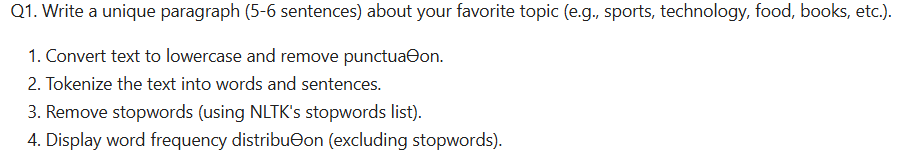

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# -------- Q1 --------

# Favorite topic paragraph
text = """Technology is evolving rapidly in today's world. Artificial intelligence, machine learning, and robotics are transforming industries.
From smartphones to smart homes, everything is becoming connected and efficient. Technology has also improved communication, healthcare, and education.
The future will likely bring innovations that we can't even imagine yet. I enjoy exploring the latest trends and gadgets in tech."""

# 1. Convert to lowercase and remove punctuation
text_lower = text.lower()
text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))

# 2. Tokenize into words and sentences
words = word_tokenize(text_no_punct)
sentences = sent_tokenize(text)

# 3. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# 4. Word frequency distribution
freq_dist = nltk.FreqDist(filtered_words)

print("Word Frequency Distribution (without stopwords):")
for word, freq in freq_dist.items():
    print(f"{word}: {freq}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Word Frequency Distribution (without stopwords):
technology: 2
evolving: 1
rapidly: 1
todays: 1
world: 1
artificial: 1
intelligence: 1
machine: 1
learning: 1
robotics: 1
transforming: 1
industries: 1
smartphones: 1
smart: 1
homes: 1
everything: 1
becoming: 1
connected: 1
efficient: 1
also: 1
improved: 1
communication: 1
healthcare: 1
education: 1
future: 1
likely: 1
bring: 1
innovations: 1
cant: 1
even: 1
imagine: 1
yet: 1
enjoy: 1
exploring: 1
latest: 1
trends: 1
gadgets: 1
tech: 1


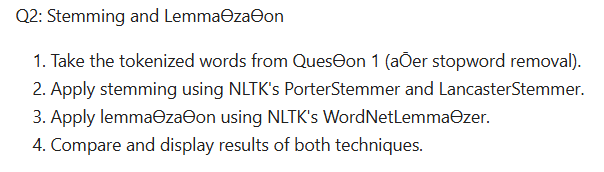

In [ ]:
# 1. Use filtered_words from above
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

# 2. Stemming
porter_stemmed = [porter.stem(word) for word in filtered_words]
lancaster_stemmed = [lancaster.stem(word) for word in filtered_words]

# 3. Lemmatization
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]

# 4. Comparison
print("\nComparison of Stemming and Lemmatization:")
print(f"{'Original':<15}{'Porter':<15}{'Lancaster':<15}{'Lemma'}")
for i in range(len(filtered_words)):
    print(f"{filtered_words[i]:<15}{porter_stemmed[i]:<15}{lancaster_stemmed[i]:<15}{lemmatized[i]}")


Comparison of Stemming and Lemmatization:
Original       Porter         Lancaster      Lemma
technology     technolog      technolog      technology
evolving       evolv          evolv          evolving
rapidly        rapidli        rapid          rapidly
todays         today          today          today
world          world          world          world
artificial     artifici       art            artificial
intelligence   intellig       intellig       intelligence
machine        machin         machin         machine
learning       learn          learn          learning
robotics       robot          robot          robotics
transforming   transform      transform      transforming
industries     industri       industry       industry
smartphones    smartphon      smartphon      smartphones
smart          smart          smart          smart
homes          home           hom            home
everything     everyth        everyth        everything
becoming       becom          becom     

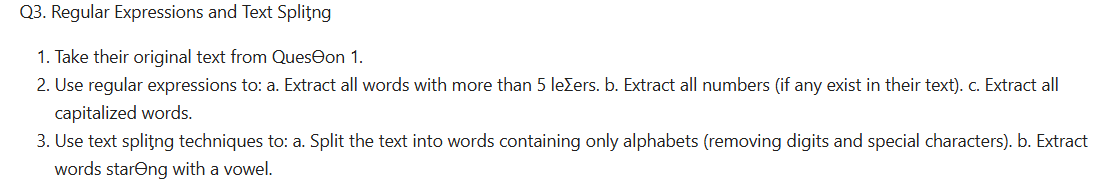

In [ ]:
# Use original text
print("\n--- Regular Expressions ---")
# a. Words with more than 5 letters
long_words = re.findall(r'\b\w{6,}\b', text)
print("Words with >5 letters:", long_words)

# b. Extract numbers
numbers = re.findall(r'\b\d+\b', text)
print("Numbers:", numbers)

# c. Capitalized words
capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', text)
print("Capitalized Words:", capitalized_words)

# Text Splitting
# a. Words containing only alphabets
alpha_words = re.findall(r'\b[a-zA-Z]+\b', text)
print("Alphabet-only Words:", alpha_words)

# b. Words starting with vowels
vowel_words = [word for word in alpha_words if word.lower().startswith(('a','e','i','o','u'))]
print("Words Starting with Vowels:", vowel_words)


--- Regular Expressions ---
Words with >5 letters: ['Technology', 'evolving', 'rapidly', 'Artificial', 'intelligence', 'machine', 'learning', 'robotics', 'transforming', 'industries', 'smartphones', 'everything', 'becoming', 'connected', 'efficient', 'Technology', 'improved', 'communication', 'healthcare', 'education', 'future', 'likely', 'innovations', 'imagine', 'exploring', 'latest', 'trends', 'gadgets']
Numbers: []
Capitalized Words: ['Technology', 'Artificial', 'From', 'Technology', 'The', 'I']
Alphabet-only Words: ['Technology', 'is', 'evolving', 'rapidly', 'in', 'today', 's', 'world', 'Artificial', 'intelligence', 'machine', 'learning', 'and', 'robotics', 'are', 'transforming', 'industries', 'From', 'smartphones', 'to', 'smart', 'homes', 'everything', 'is', 'becoming', 'connected', 'and', 'efficient', 'Technology', 'has', 'also', 'improved', 'communication', 'healthcare', 'and', 'education', 'The', 'future', 'will', 'likely', 'bring', 'innovations', 'that', 'we', 'can', 't', 'e

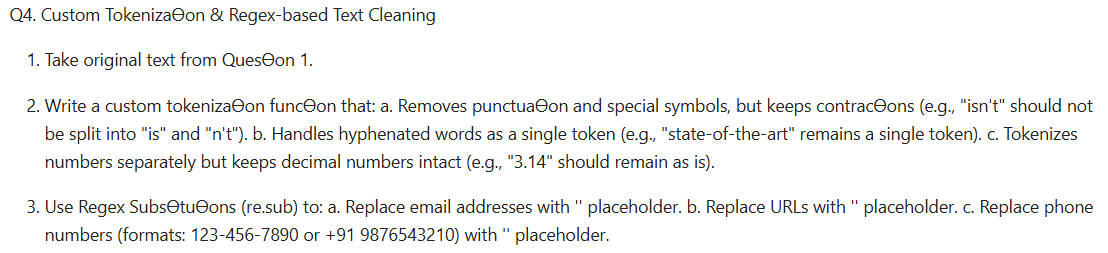

In [ ]:
def custom_tokenizer(text):
    text = re.sub(r'[^\w\s\.\-\'’]', '', text)
    tokens = re.findall(r"\b(?:\d+\.\d+|\d+|[a-zA-Z]+(?:['’][a-zA-Z]+)?(?:-[a-zA-Z]+)*)\b", text)
    return tokens

tokens_custom = custom_tokenizer(text)
print("\nCustom Tokens:", tokens_custom)

# Regex Substitutions
sample_text = "Contact me at test.email@example.com or visit https://example.com. Call me at 123-456-7890 or +91 9876543210."

# a. Replace email addresses
sample_text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', 'keshav@gmail.com', sample_text)

# b. Replace URLs
sample_text = re.sub(r'https?://\S+|www\.\S+', 'www.keshav.com', sample_text)

# c. Replace phone numbers
sample_text = re.sub(r'(\+91\s?\d{10}|\d{3}-\d{3}-\d{4})', '+91-98650000', sample_text)

print("\nAfter Regex Substitutions:", sample_text)



Custom Tokens: ['Technology', 'is', 'evolving', 'rapidly', 'in', "today's", 'world', 'Artificial', 'intelligence', 'machine', 'learning', 'and', 'robotics', 'are', 'transforming', 'industries', 'From', 'smartphones', 'to', 'smart', 'homes', 'everything', 'is', 'becoming', 'connected', 'and', 'efficient', 'Technology', 'has', 'also', 'improved', 'communication', 'healthcare', 'and', 'education', 'The', 'future', 'will', 'likely', 'bring', 'innovations', 'that', 'we', "can't", 'even', 'imagine', 'yet', 'I', 'enjoy', 'exploring', 'the', 'latest', 'trends', 'and', 'gadgets', 'in', 'tech']

After Regex Substitutions: Contact me at keshav@gmail.com or visit www.keshav.com Call me at +91-98650000 or +91-98650000.
